In [1]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import math
import seaborn as sb
from scipy.stats import iqr
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [2]:
df=pd.read_csv("ParisHousingClass.csv")
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9,Basic
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0,Basic
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5,Basic
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0,Basic


In [3]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text

# Load the data into a pandas DataFrame
data = pd.read_csv("ParisHousingClass.csv")

df = pd.DataFrame(data)

# Separate features (X) and target variable (y)
X = df.drop(['price', 'category'], axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Display the decision tree rules
tree_rules = export_text(tree_reg, feature_names=list(X.columns))
print(tree_rules)


Mean Squared Error: 32536359.86294506
|--- squareMeters <= 49302.50
|   |--- squareMeters <= 24679.00
|   |   |--- squareMeters <= 12188.50
|   |   |   |--- squareMeters <= 6154.50
|   |   |   |   |--- squareMeters <= 3067.00
|   |   |   |   |   |--- squareMeters <= 1524.50
|   |   |   |   |   |   |--- squareMeters <= 790.00
|   |   |   |   |   |   |   |--- squareMeters <= 397.00
|   |   |   |   |   |   |   |   |--- squareMeters <= 235.00
|   |   |   |   |   |   |   |   |   |--- squareMeters <= 183.50
|   |   |   |   |   |   |   |   |   |   |--- squareMeters <= 124.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- squareMeters >  124.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- squareMeters >  183.50
|   |   |   |   |   |   |   |   |   |   |--- cityPartRange <= 6.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of dep

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Load the data into a pandas DataFrame
data = pd.read_csv("ParisHousingClass.csv")

df = pd.DataFrame(data)

# Separate features (X) and target variable (y)
features = ['hasPool', 'isNewBuilt', 'hasYard']
X = df[features]
y = df['price']

# Initialize the DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Fit the model to the entire dataset
tree_reg.fit(X, y)

# Display the decision tree rules
tree_rules = export_text(tree_reg, feature_names=features)
print(tree_rules)


|--- isNewBuilt <= 0.50
|   |--- hasPool <= 0.50
|   |   |--- hasYard <= 0.50
|   |   |   |--- value: [4999689.61]
|   |   |--- hasYard >  0.50
|   |   |   |--- value: [4989629.20]
|   |--- hasPool >  0.50
|   |   |--- hasYard <= 0.50
|   |   |   |--- value: [5018989.81]
|   |   |--- hasYard >  0.50
|   |   |   |--- value: [5085540.21]
|--- isNewBuilt >  0.50
|   |--- hasPool <= 0.50
|   |   |--- hasYard <= 0.50
|   |   |   |--- value: [5123755.36]
|   |   |--- hasYard >  0.50
|   |   |   |--- value: [4918455.92]
|   |--- hasPool >  0.50
|   |   |--- hasYard <= 0.50
|   |   |   |--- value: [4899581.93]
|   |   |--- hasYard >  0.50
|   |   |   |--- value: [4907260.14]



In [6]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_text
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Assuming your data is stored in a DataFrame named df

# Select relevant features and target variable
features = ['hasPool', 'isNewBuilt', 'hasYard']
target = 'category'

# Create a label encoder for the target variable
le = preprocessing.LabelEncoder()
df[target] = le.fit_transform(df[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Visualize the decision tree rules
tree_rules = export_text(clf, feature_names=features)
print(tree_rules)


|--- hasPool <= 0.50
|   |--- class: 0
|--- hasPool >  0.50
|   |--- isNewBuilt <= 0.50
|   |   |--- class: 0
|   |--- isNewBuilt >  0.50
|   |   |--- hasYard <= 0.50
|   |   |   |--- class: 0
|   |   |--- hasYard >  0.50
|   |   |   |--- class: 1



In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named df

# Select relevant features and target variable
features = ['hasPool', 'isNewBuilt', 'hasYard']
target = 'category'

# Create a label encoder for the target variable
le = preprocessing.LabelEncoder()
df[target] = le.fit_transform(df[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Visualize the decision tree rules in text format
tree_rules = export_text(clf, feature_names=features)
print(tree_rules)

# Visualize the decision tree graphically
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=features, class_names=list(map(str, le.classes_)), filled=True, rounded=True, fontsize=10)
plt.show()

|--- hasPool <= 0.50
|   |--- class: 0
|--- hasPool >  0.50
|   |--- isNewBuilt <= 0.50
|   |   |--- class: 0
|   |--- isNewBuilt >  0.50
|   |   |--- hasYard <= 0.50
|   |   |   |--- class: 0
|   |   |--- hasYard >  0.50
|   |   |   |--- class: 1



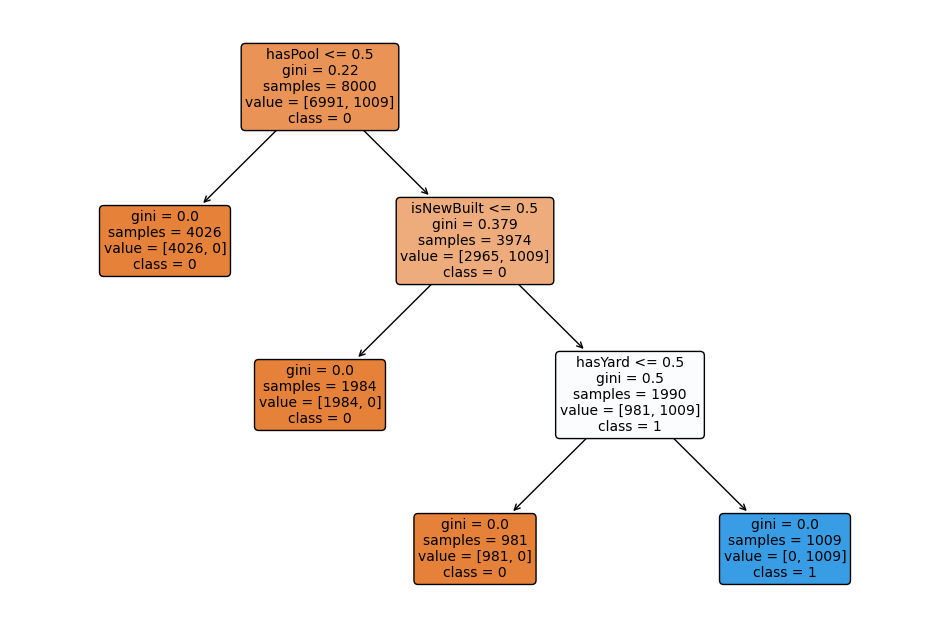

In [14]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named df

# Select relevant features and target variable
features = ['hasPool', 'isNewBuilt', 'hasYard']
target = 'category'

# Create a label encoder for the target variable
le = preprocessing.LabelEncoder()
df[target] = le.fit_transform(df[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
clf.fit(X_train, y_train)

# Visualize the decision tree rules in text format
tree_rules = export_text(clf, feature_names=features)
print(tree_rules)

# Visualize the decision tree graphically
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=features, class_names=list(map(str, le.classes_)), filled=True, rounded=True, fontsize=10)
plt.show()